# Project-based engineering competition in upper-level engineering laboratory
## Ryan C. Cooper

<img alt="UConn engineering logo" src = ./soe-uconn.png height = "500" width = "400" align="right">


# About me - Ryan C. Cooper

__GitHub__: <img align="left" alt = "octocat image" src = "https://avatars.githubusercontent.com/u/583231?v=4" width = "70"/> [@cooperrc](https://github.com/cooperrc)

__email:__ ryan.c.cooper@uconn.edu
- Assistant Professor-in-Residence 
- University of Connecticut Mechanical Engineering Department 
- Father of two boys
- Runner, bicyclist, and skateboarder

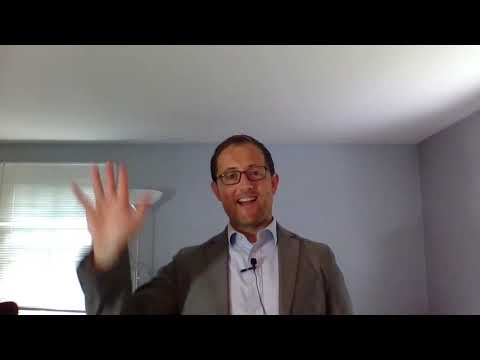

In [13]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('pvdID82aMEg')

# Accessing this presentation and \*more\*
<img src="github-qr.svg" align = "right" width = "200"/>

- My website has Open Educational Resources: [cooperrc.github.io](https://cooperrc.github.io)
    - Join me, redistribute work, add suggestions
    - Textbooks should be __open__ and __educational__
- These slides are hosted at [github.com/cooperrc/2021-ASEE-NE_PjBL-labs](https://github.com/cooperrc/2021-ASEE-NE_PjBL-labs)
    - code to evaluate grades included
    - student data is not online (some info is PII)

# What is Project/Problem-Based Learning

## Problem-based Learning (PBL)
- Identify a problem
- Give clear instructions or steps to solve the problem

## Project-Based Learning (PjBL)
- Identify a clear goal
- Students iterate problem-solving approaches 
- Design their own approach

# Motivation - Why am I using Projects and Problems?
- Students expect a hands-on engineering experience
- We, _professors_, give them an analytical background
- Computational work (i.e. Jupyter) s used here to connect empirical+analytical
<center><img alt = 'kant-vs-hume and analytical-vs-empirical venn diagram' src = analytic-vs-empirical.svg height="1000"/></center>

# Motivation - Why am I using Projects and Problems?
## Most important ABET outcomes ranked by practicing engineers, employers, and recent graduates 
### 1. problem solving 
Students need practice solving problems
### 2. communication
Students need to share results e.g. improve technical writing

# Grading PBL + PjBL work: Specifications grading
- Lab reports are given scores
- Scores that meet overall specifications (>70) pass
- Detailed rubric focuses TA feedback
- Token system:
    - Groups have 2 tokens
    - Token is used for late assignment or revision
- Also called competency-based or ~~_mastery-based_~~ [I don't like this term]


# Methods: Fall 2018 + Fall 2019 - Fall 2020 
<img align="right" src = "./lab_schedule.svg" width = "300"/>

- 5 PBL labs with content in Jupyter (Labs 0-4)
- 1 PjBL lab open-ended with definite goal Lab 5
    - $150 cash prize _most accurate_
    - party for _most precise section_
- Assess technical writing improvements with [rubric](https://github.com/cooperrc/sensors_and_data/blob/master/Rubric.pdf)
- survey students for most important skills
- survey students for capstone preparedness
- measure total error in student Project predictions
- _I assumed_ improvements in technical writing scores are improvements in
  communication
- _I feared_ students with \>70 on lab 0 would decrease scores


# Methods: Fall 2018 + Fall 2019 - Fall 2020
<img align="center" src = "./lab_schedule.svg" width = "700"/>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from statsmodels.stats.anova import AnovaRM

plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3
plt.rcParams["figure.figsize"] = [7, 5]

f2018 = pd.read_csv('../track_progress/2018_reports/report_grades.csv')
f2018=f2018.dropna()
f2019 = pd.read_csv('../track_progress/2019_reports/report_grades.csv')
f2019=f2019.dropna()
C19 = f2019.columns[6:-2]
C18 = f2018.columns[4:-2]
my_dict = {'ID':np.array([]),
           'grades':np.array([]),
          'report':np.array([],dtype=int)}
for i,L in enumerate(C18):
    my_dict['ID']=np.block([my_dict['ID'],
                            f2018['Student ID'].astype(int)])
    my_dict['grades']=np.block([my_dict['grades'],
                                f2018[L].astype(int)])
    my_dict['report']=np.block([my_dict['report'],
                                i*np.ones(len(f2018[L]),dtype=int)])
for i,L in enumerate(C19):
    my_dict['ID']=np.block([my_dict['ID'],
                            f2019['Student ID'].astype(int)])
    my_dict['grades']=np.block([my_dict['grades'],
                                f2019[L].astype(int)])
    my_dict['report']=np.block([my_dict['report'],
                                i*np.ones(len(f2019[L]),dtype=int)])
df = pd.DataFrame(data=my_dict)
df.dropna()
aovrm = AnovaRM(df.dropna(), 'grades', 'ID', within=['report'])
#res = aovrm.fit()

#print(res)

print(aovrm.fit())
print(len(f2018)+len(f2019))


grades18 = f2018.values[:,4:]
grades18[np.where(grades18=='Needs Grading')] = 0
grades18 = grades18.astype(float)

grades19 = f2019.values[:,6:]
grades19[np.where(grades19=='Needs Grading')] = 0
grades19 = grades19.astype(float)


                Anova
       F Value Num DF   Den DF  Pr > F
--------------------------------------
report 23.7442 4.0000 1776.0000 0.0000

445


# Results: Labs 0-4 saw continuous improvement
- The technical writing scores continued improving throughout semester
- Red-dash line shows minimal passing grade
- Average continually improved

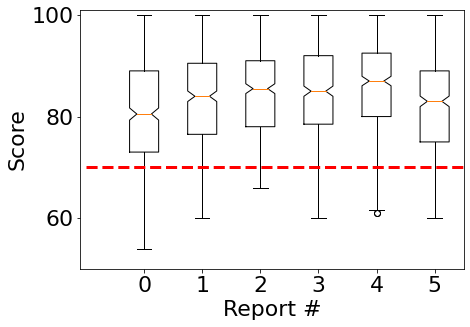

In [14]:
plt.boxplot([np.block([grades18[:,j],grades19[:,j]]) for j in range(0,7)],notch=True)
plt.xticks(np.arange(1,8),[str(i) for i in np.arange(0,7)])
plt.ylim(50,101)
plt.plot([0,8],[70,70],'r--')
plt.xlabel('Report #')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig('report_scores.png')
plt.xlim(-0.1,6.5);

# Individual technical writing showed continuous improvement
- Average slope of grades from 0-4 calculated
- Plotted here vs grade on Lab 0
- Over 56% showed improvement
- 30-40% maintained high quality work
- less than 4% of class could not meet standards, but showed improvemnt

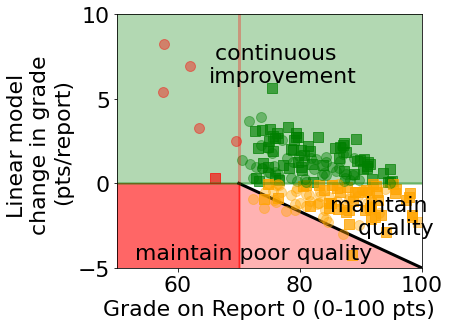

In [6]:
delta_grade18 = np.zeros(220)
grade18_0 = np.zeros(220)
r = np.arange(0,5)
cnt = 0
cnt_incr = 0
for i in range(0,220):
    f = np.polyfit(range(0,6),grades18[i,0:6],1)
    delta_grade18[i] =f[0]
    grade18_0[i] = f[1]
    if grades18[i,0] < 75:
        cnt+=1
        line_alpha = (f[0])/9
        if line_alpha<0.1: line_alpha=0.1
        if f[0]>0:
            cnt_incr+=1


delta_grade19 = np.zeros(228)
grade19_0 = np.zeros(228)
r = np.arange(0,5)
cnt = 0
cnt_incr = 0
for i in range(0,100):
    f = np.polyfit(range(0,6),grades19[i,0:6],1)
    delta_grade19[i] =f[0]
    grade19_0[i] = f[1]
    if grades19[i,0] < 75:
        cnt+=1
        line_alpha = (f[0])/9
        if line_alpha<0.1: line_alpha=0.1
#         plt.plot(r,f[0]*r+f[1],'r-',alpha = line_alpha)
#         plt.plot(r,grades19[i,0:5],'ko',alpha = 0.1)
        if f[0]>0:
            cnt_incr+=1
rect = plt.Rectangle((50,-5),width=20,height=5,color='r',fill=True,alpha = 0.6)
plt.gca().add_patch(rect)
#rect = plt.Rectangle((70,-5),width=30,height=5,color='yellow',fill=True,alpha = 0.5)
#plt.gca().add_patch(rect)
rect = plt.Rectangle((50,0),width=50,height=10,color='green',fill=True,alpha = 0.3)
plt.gca().add_patch(rect)
#tri = plt.Polygon(np.array([[0,70],[-5,70],[-5,100]]),closed=True,fill=True)


plt.fill(np.array([70,70,100,70]),np.array([0,-5,-5,0]),'r',alpha=0.3)
plt.plot(np.linspace(70,100),-np.linspace(0,5),'k-')


pass0 = np.where((grade18_0>70) & (delta_grade18>=0))
fail0 = np.where(grade18_0<=70)
dang0 = np.where((grade18_0>70) & (delta_grade18<0))
plt.plot(grade18_0[pass0],delta_grade18[pass0],'gs',markersize=10, alpha=0.4,label='passed lab 0')
plt.plot(grade18_0[dang0],delta_grade18[dang0],'s',color='orange',markersize=10, alpha=0.5,label='passed lab 0')
plt.plot(grade18_0[fail0],delta_grade18[fail0],'rs',markersize=10, alpha=0.4,label='failed lab 0')


pass0 = np.where((grade19_0>70) & (delta_grade19>=0))
dang0 = np.where((grade19_0>70) & (delta_grade19<0))
fail0 = np.where(grade19_0<=70)

plt.plot(grade19_0[pass0],delta_grade19[pass0],'go',markersize=10, alpha=0.4,label='passed lab 0')
plt.plot(grade19_0[dang0],delta_grade19[dang0],'o',color='orange',markersize=10, alpha=0.4,label='passed lab 0')
plt.plot(grade19_0[fail0],delta_grade19[fail0],'ro',markersize=10, alpha=0.4,label='failed lab 0')
plt.plot([70,70],[-5,10],'r-',alpha=0.3,label='pass-fail threshold')
plt.plot([0,100],[0,0],'g-',alpha=0.3,label='no change')
plt.xlim(50,100)
plt.ylim(-5,10)

plt.text(65,6,' continuous\nimprovement')
plt.text(85,-3,'maintain\n    quality')
plt.text(53,-4.5,'maintain poor quality')
#plt.legend(bbox_to_anchor=(0.5, 1.05),fancybox=True,shadow=True)
plt.xlabel('Grade on Report 0 (0-100 pts)')
plt.ylabel('Linear model \nchange in grade \n(pts/report)');
plt.tight_layout()

# Problem-solving evaluated with project results

- The students were
    - given access to experimental equipment from labs 0-4
    - told to measure its mass with a vibrating cantilever beam
- Error = (reported value - the actual value) in mass reported in 
    - Fall 2018: 18 ± 33 g
    - Fall 2019: 11.4 ± 27 g
    - actual objects: 32 ± 2 g

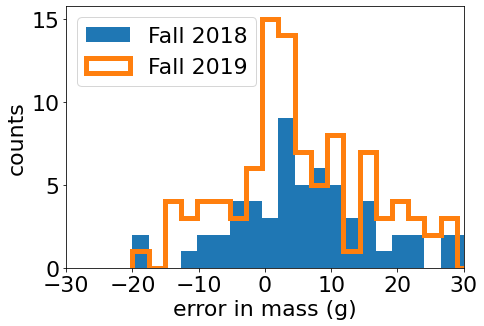

In [11]:
# 2018 masses
x=np.linspace(-20,100,50)

tjm18=tjm=np.array([32.3280,
  32.9222,
  32.4845,
  32.7656,
  32.1623,
  32.4566,
  32.0418,
  32.3890,
  33.6936,
  31.9106,
  32.3104,
  32.8166])

data_contest=pd.read_csv('../track_progress/Mass Measurement Contest - Lab 5 Findings (Responses) - Form Responses 18.csv')
data_contest=data_contest.dropna()
serial_no=data_contest['What serial number did you measure (TJM 1-12)?']
mass_meas=data_contest['What was its mass in grams?']
SN = serial_no.dropna()
SN = SN.values
error=-(tjm[SN.astype(int)-1]-mass_meas)
acc=abs(error).sort_values()
i_win=acc.index.values
sections=['Lab 001',
'Lab 002',
'Lab 003',
'Lab 004',
'Lab 005',
'Lab 006',
'Lab 007',
'Lab 008',
'Lab 009',
'Lab 010',
'Lab 011',
'Lab 012',
'Lab 013',
'Lab 014']


plt.hist(error,x,label='Fall 2018')

# 2019 masses
tjm19=tjm=np.array([28.491,
  30.156,
  31.453,
  29.742,
  32.666,
  28.591,
  29.348,
  28.682,
  32.141,
  30.276,
  31.143,
  26.046])



f='../track_progress/Mass Measurement Contest - Lab 5 Result and Methods (Responses) - Form Responses 19.csv'
data_contest=pd.read_csv(f)
data_contest=data_contest.dropna(subset=['What serial number did you measure (TJM 1-12)?'])
serial_no=data_contest['What serial number did you measure (TJM 1-12)?'].values
mass_meas=data_contest['What was its mass in grams?']
error=-(tjm[serial_no.astype(int)-1]-mass_meas)
data_contest['TJM ## mass (g)']=tjm[serial_no.astype(int)-1]
data_contest['mass error']=error
acc=abs(error).sort_values()
i_win=acc.index.values



plt.hist(error,x,label='Fall 2019',histtype='step',linewidth=5)




#plt.hist(tjm19-np.mean(tjm19),x/2)
#plt.hist(tjm18-np.mean(tjm18),x/2)
plt.xlabel('error in mass (g)')
plt.ylabel('counts')
plt.xlim(-30,30)
plt.legend(loc='upper left');
plt.tight_layout()
plt.savefig('mass_measure.png')

# Student preparedness survey

- polled the 2019-2020 senior capstone teams 
- Students’ comments:
    - “Was a great and helpful class”
    - “Great class! Very helpful for senior design”,
    - “ME3263 was a great course for technical writing.” 
- Students asked how useful each skill
- Over 50% of the class of 270, agreed that all eight skills were useful 



# Student preparedness survey

- 50% of the class considered technical writing to be a crucial skill
- Fall 2018 and Fall 2019, over 45% felt prepared
- students hadn’t taken the course less than 30% felt prepared
- statistically significant difference between preparedness that took the PjBL course and those that did not. This measurement

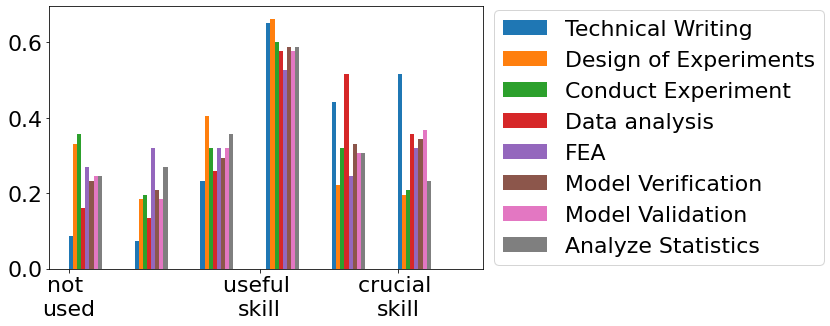

In [12]:
prep = pd.read_csv('../track_progress/me3263_prepare.csv')
labels = ['Technical Writing','Design of Experiments','Conduct Experiment','Data analysis','FEA','Model Verification','Model Validation','Analyze Statistics']
data = prep.values[3:11]
prep18=prep[prep['I\xa0took ME 3263 - Introduction to Sensors and Data in ']=='Fall 2018']
prep19=prep[prep['I\xa0took ME 3263 - Introduction to Sensors and Data in ']=='Fall 2019']
prepna=prep[prep['I\xa0took ME 3263 - Introduction to Sensors and Data in ']=='none']
data = prep.iloc[:, 3:11].values
prep.iloc[:, 3:11]
plt.figure(figsize=(12,5))
plt.hist(data,np.linspace(0,6,13),label=labels,rwidth=10,density=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0,2.9,5],['not \nused','useful \nskill','crucial \nskill'])
plt.tight_layout()

# Conclusions
<img src="github-qr.svg" align = "right" width = "150"/>

- Students need opportunities for PBL and PjBL in every class
    - it improves tech writing
    - it connects empirical and analytical methods
- Jupyter is an _awesome_ way to build open educational resources
    - connects empirical to analytical methods
    - interactive materials encourage experimentation and exploration
    - free and __open__: you can download/modify/redistribute _great for building student portfolios_
- Critera-based grading is first step to _my ungrading journey_
    - \>80% of students liked the system
    - the failing cases were a mix of apathetic and enraged

# Lessons learned

- Community is crucial:
    - Establish safe and respectful communication
    - Encourage collaboration
- Students thrive with goals
- Test-taking students scared of open-ended assignments
    - Rubrics help (detailed, but not prescriptive)
    - Grace in deadlines and revisions helps

# Future work
<img src="github-qr.svg" align = "right" width = "150"/>

- Criteria-based grading is my first step towards _ungrading_
- My classes _based upon this work_ have moved to unlimited revisions _no tokens or P/F_
- Ideally, students create portfolio of engineering work
- My role would be:
    - identify resources
    - troubleshoot modeling/testing
    - teaching and learning

# Question + Discussions? 
<img src="github-qr.svg" align = "center" width = "500"/>